<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/%5BQuestion%5D_Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [93]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
df = pd.read_excel('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [95]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [96]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [97]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [98]:
# column yang dianggap tidak penting
unimportant_column = [
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'TANGGAL', 'JAM', 'LAMA_CRD'
]

# Menghapus column yang tidak penting
df.drop(unimportant_column, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS
0,IN,JUL,6.0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,2200.0,CASH DISCOUNT
1,IN,JUL,6.0,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,23000.0,CASH DISCOUNT
2,IN,JUL,6.0,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,9500.0,CASH DISCOUNT
3,IN,JUL,6.0,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,6900.0,CASH DISCOUNT
4,IN,JUL,6.0,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,13500.0,CASH DISCOUNT


In [99]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KAS,ITEM,TGL_TRANS,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS
count,136294.000000,148486.000000,148486,148486.000000,148486.000000,148486.000000,146957.000000,146600.000000,1.484860e+05
mean,4.497381,21322.181445,2017-01-15 21:02:24.159045376,3.163174,19901.017212,21795.990560,0.437617,0.334158,6.137361e+04
min,1.000000,1.000000,2017-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,5221.000000,2017-01-07 00:00:00,1.000000,3728.920000,4425.000000,0.000000,0.000000,5.800000e+03
50%,5.000000,13839.000000,2017-01-15 00:00:00,1.000000,8365.180000,9600.000000,0.000000,0.000000,1.270000e+04
75%,6.000000,35802.750000,2017-01-25 00:00:00,2.000000,17769.380000,20200.000000,0.000000,0.000000,3.060000e+04
max,15.000000,700047.000000,2017-01-31 00:00:00,2000.000000,720000.000000,900000.000000,50.000000,10.000000,3.778570e+07
std,1.906136,25881.022963,NaN,16.266576,38566.965857,40289.934102,2.475039,1.631778,3.981378e+05


In [100]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KAS,12195
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
STS_BYR,12195
QTY,3


In [101]:
# Drop baris dengan nilai null hanya di kolom tertentu
columns_to_drop_null = ['KD_SBR', 'TP_TRN', 'KEL', 'ITEM', 'NAMA', 'TGL_TRANS',
                        'QTY', 'HRG_PKK', 'HRG_JUL', 'JLH_TRANS', 'KET_TRANS']
df.dropna(subset=columns_to_drop_null, inplace=True)

# Mengisi nilai null di kolom lainnya
df['KAS'] = df['KAS'].fillna(df['KAS'].mode()[0])  # Mengisi dengan modus
df['STS_BYR'] = df['STS_BYR'].fillna(df['STS_BYR'].mode()[0])  # Mengisi dengan modus
df['DISC'] = df['DISC'].fillna(df['DISC'].mean())  # Mengisi dengan rata-rata
df['PPN'] = df['PPN'].fillna(df['PPN'].mode()[0])  # Mengisi dengan modus

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0
TP_TRN,0
KAS,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
STS_BYR,0
QTY,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


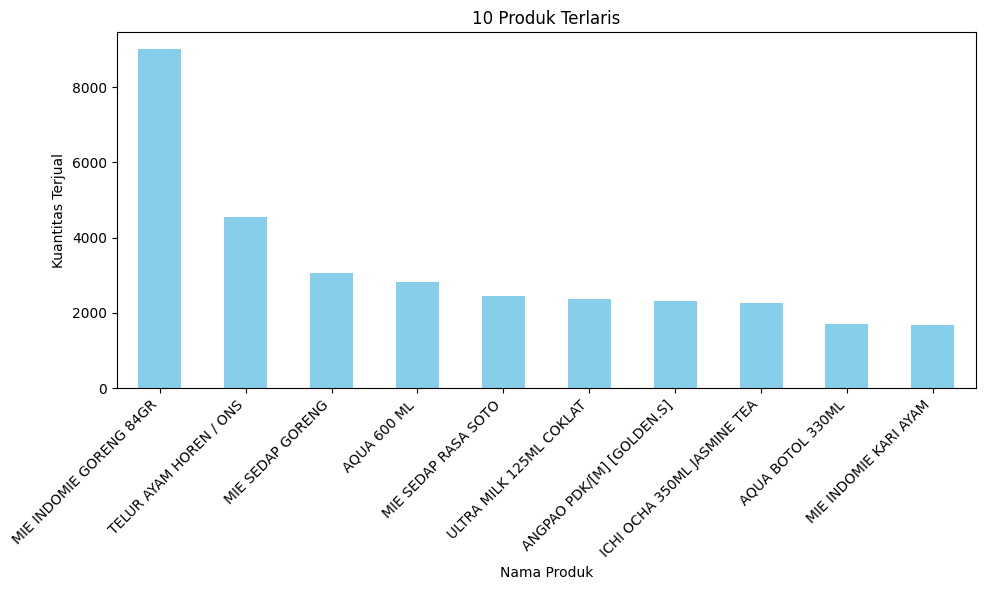

In [102]:
# Visualisasi Produk Terlaris
import matplotlib.pyplot as plt
top_selling = df.groupby('NAMA').agg({'QTY': 'sum'}).sort_values(by='QTY', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_selling['QTY'].plot(kind='bar', color='skyblue')
plt.title('10 Produk Terlaris')
plt.xlabel('Nama Produk')
plt.ylabel('Kuantitas Terjual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


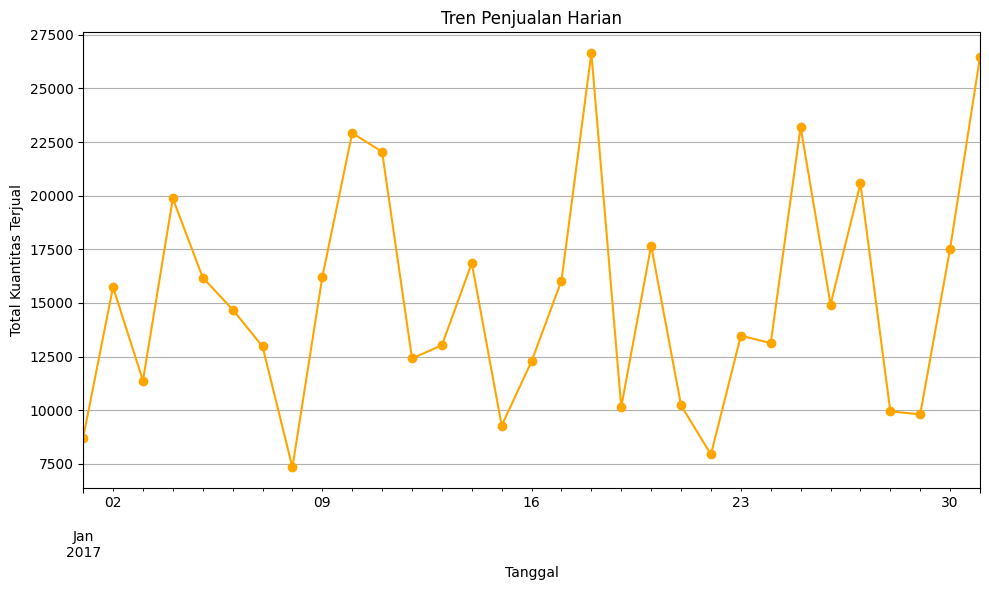

In [103]:
# Visualisasi Tren Penjualan Harian

df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])

sales_daily = df.groupby('TGL_TRANS').agg({'QTY': 'sum'})

plt.figure(figsize=(10, 6))
sales_daily['QTY'].plot(kind='line', marker='o', color='orange')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Kuantitas Terjual')
plt.grid()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


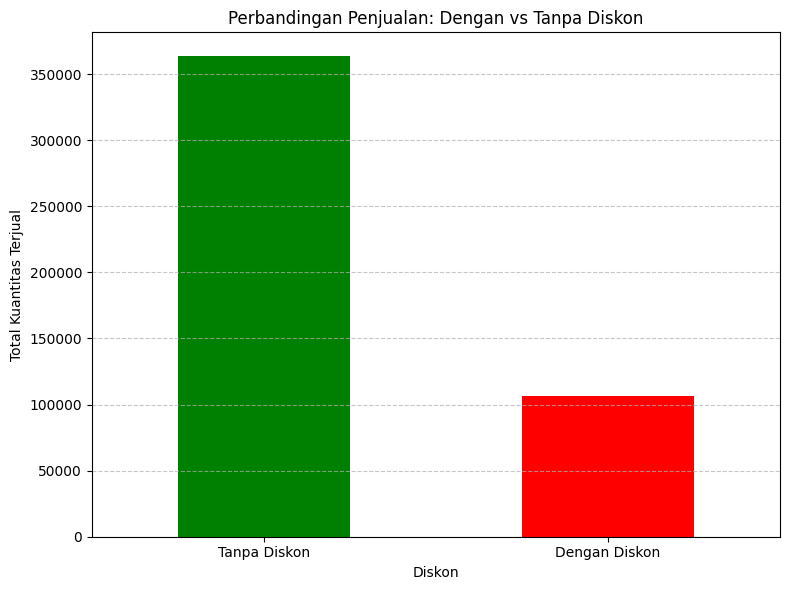

In [104]:
# Penjualan dengan atau tanpa Diskon
if 'DISC' in df.columns:
    df['Diskon_Ada'] = df['DISC'] > 0
    discount_sales = df.groupby('Diskon_Ada').agg({'QTY': 'sum'})

    discount_sales['QTY'].plot(kind='bar', color=['green', 'red'], figsize=(8, 6))
    plt.title('Perbandingan Penjualan: Dengan vs Tanpa Diskon')
    plt.xlabel('Diskon')
    plt.ylabel('Total Kuantitas Terjual')
    plt.xticks(ticks=[0, 1], labels=['Tanpa Diskon', 'Dengan Diskon'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Apriopi

In [105]:
# Group data by 'NO_BKT' and 'KEL' and sum quantities
df['QTY'] = df.groupby(['NO_BKT', 'KEL'])['KEL'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
data = df.drop_duplicates(subset=['NO_BKT', 'KEL'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='NO_BKT', columns='KEL', values='QTY', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,

In [106]:
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-106-f1091186c110>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

In [107]:
from mlxtend.frequent_patterns import apriori, association_rules
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [108]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
6,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,0.010076,1.169036,0.458205
7,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,0.010076,1.070707,0.503776
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


In [109]:
# Filter aturan dengan lift tinggi untuk menemukan produk komplementer
high_lift_rules = rules[rules['lift'] > 1.5]

# Menampilkan rekomendasi layout
for index, row in high_lift_rules.iterrows():
    print(f"Consider placing {list(row['antecedents'])} near {list(row['consequents'])}.")


Consider placing ['BISCPAK'] near ['SNACK'].
Consider placing ['SNACK'] near ['BISCPAK'].
Consider placing ['MIE'] near ['DETERJN'].
Consider placing ['DETERJN'] near ['MIE'].
Consider placing ['SOFTENR'] near ['DETERJN'].
Consider placing ['DETERJN'] near ['SOFTENR'].
Consider placing ['DETERJN'] near ['SUSU KT'].
Consider placing ['SUSU KT'] near ['DETERJN'].
Consider placing ['P GIGI'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['P GIGI'].
Consider placing ['SABUN.M'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['SABUN.M'].
Consider placing ['P GIGI'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['P GIGI'].
Consider placing ['SABUN.M'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['SABUN.M'].
Consider placing ['SHAMPOO'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['SHAMPOO'].
Consider placing ['SABUN.M'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['SABUN.M'].
Consider placing ['SABUN.M', 'P GIGI'] near ['SHAMPOO'].
Consider placing ['SA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Produk yang Sering Dikombinasikan:

**BISCPAK dan SNACK** sering dibeli bersama, dengan tingkat dukungan (support) sebesar 2,2% dan kepercayaan (confidence) tinggi (>30% untuk kedua arah). Keduanya menunjukkan hubungan erat, yang dapat digunakan untuk promosi silang.

**DETERJN** memiliki keterkaitan kuat dengan **MIE** (2,3%) dan **SOFTENR** (2,7%), yang menunjukkan bahwa pembeli cenderung membeli produk-produk rumah tangga ini bersamaan.


### Korelasi pada Produk Kebutuhan Bayi dan Personal Care:

**P GIGI** memiliki hubungan kuat dengan **SABUN.M dan SHAMPOO**, dengan tingkat kepercayaan tinggi (>45%). Kombinasi ini bisa menjadi rekomendasi untuk paket promosi.
**PAMPERS** sering dikaitkan dengan **SABUN.M dan SHAMPOO**, meskipun tingkat dukungan lebih rendah (2,1%-2,3%).


###Kelompok Produk dengan Hubungan Kompleks:

**SABUN.M, P GIGI, dan SHAMPOO** sering dibeli bersama dalam berbagai kombinasi, dengan tingkat dukungan mencapai 2,4%. Hubungan ini memiliki tingkat kepercayaan yang tinggi (>59%), menunjukkan potensi untuk bundling produk.


### Produk dengan Lift Tinggi:

Kombinasi **SOFTENR dan DETERJN **memiliki lift sebesar 7,7, menunjukkan hubungan kuat di luar kebetulan. Ini dapat dimanfaatkan untuk tata letak toko atau diskon berbasis pasangan produk.


###Peluang Tata Letak dan Promosi:
Penempatan barang seperti **P GIGI di dekat SABUN.M atau SHAMPOO **dapat meningkatkan penjualan karena tingginya keterkaitan pembelian.
Kelompok produk rumah tangga **(DETERJN, SOFTENR, dan SUSU KT**) menunjukkan keterkaitan signifikan yang mendukung strategi tata letak berbasis kebutuhan rumah tangga.


###Potensi Bundling:

Kombinasi **SABUN.M, P GIGI, dan SHAMPOO** adalah peluang bundling yang menarik karena memiliki confidence tinggi (>63%) dalam berbagai kombinasi.


**Promosi Berdekatan:** Berikan diskon tambahan untuk pembelian produk yang sering dibeli bersama, seperti SOFTENR dan DETERJN.


**Penataan Kreatif:** Gunakan signage untuk menunjukkan hubungan antara produk terkait, seperti "Pasangkan dengan ini!" untuk menarik perhatian pelanggan.

###Seasonal Insights (Tren Musiman)
Melihat data yang ada, tidak ada indikasi yang jelas tentang permintaan musiman tertentu, namun dapat diasumsikan bahwa produk seperti MIE, DETERJN, dan SNACK cenderung memiliki permintaan yang stabil sepanjang tahun. Produk-produk seperti PAMPERS dan SABUN.M mungkin mengalami lonjakan permintaan seiring dengan musim tertentu, terutama selama periode liburan atau saat pergantian musim.